<a href="https://colab.research.google.com/github/KSaiBharadwaj/fraudanalytics/blob/main/DSO562HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

creditdata = pd.read_csv("/content/sample_data/creditcard.csv")
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isFraud                 6669 non-null   int64  
 1   transactionID           6669 non-null   object 
 2   creditcardID            6669 non-null   object 
 3   merchantID              6669 non-null   object 
 4   datetime                6669 non-null   object 
 5   category                6669 non-null   object 
 6   country                 6669 non-null   object 
 7   country_cat             6669 non-null   object 
 8   age                     6669 non-null   int64  
 9   age_cat                 6669 non-null   object 
 10  zscore_age              6669 non-null   float64
 11  minmax_age              6669 non-null   float64
 12  amount                  6669 non-null   float64
 13  logamt                  6669 non-null   float64
 14  zscore_logamt           6669 non-null   

Text(0, 0.5, 'Count')

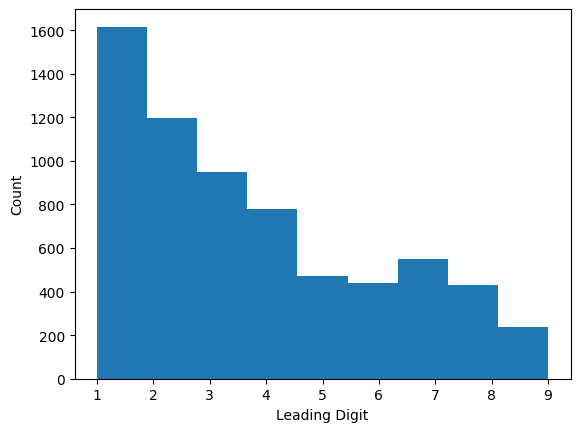

In [2]:
# using amount column to check benford's law

amdt = creditdata["amount"]
fdigit = amdt.apply(lambda x:str(x)[0])


fdigitlist = []
for k in fdigit:
  fdigitlist.append(k)

# As there are no other values we can sort and plot the values

fdigitlist.sort()
plt.hist(fdigitlist,bins=(len(set(fdigitlist))))
plt.xlabel('Leading Digit')
plt.ylabel('Count')

Based on initial analysis, the plot follows benford's law.

**Problem 2**

Text(0, 0.5, 'Count')

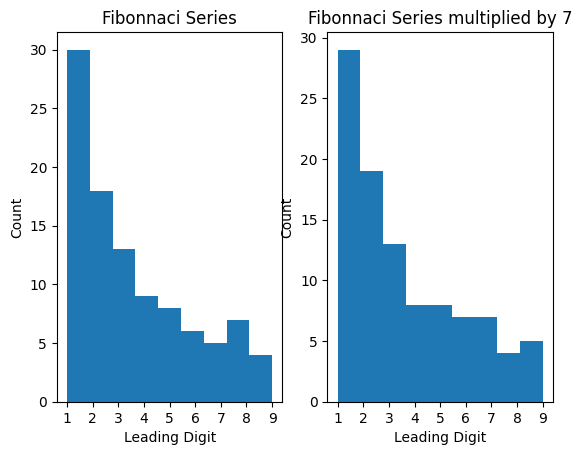

In [3]:
# Creating Fibonnaci series (100)

fib = [1,1]
mulfib = [7,7]
leadfib =[]
mulleadfib = []
for i in range (2,100):
  fib.append(fib[i-1] + fib[i-2])
  mulfib.append(7 * (fib[i-1] + fib[i-2]))

#Calculating Leading digits of Fibonnaci series and plotting
for i in range (len(fib)):
  leadfib.append(str(fib[i])[0])
  mulleadfib.append(str(mulfib[i])[0])

leadfib.sort()
mulleadfib.sort()
plt.subplot(1,2,1)
plt.hist(leadfib, bins=(len(set(leadfib))))
plt.title('Fibonnaci Series')
plt.xlabel('Leading Digit')
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.hist(mulleadfib, bins=(len(set(mulleadfib))))
plt.title('Fibonnaci Series multiplied by 7')
plt.xlabel('Leading Digit')
plt.ylabel('Count')


**Problem 3**

In [4]:
# Defining the null and alternate hypothesis

# Null Hypothesis: H0
# The color of plain M&M follows the manufacturer’s stated distribution.
# Distribution is same

# Alternative Hypothesis: H1
# The color of plain M&M follows a different distribution.
# Distribution is NOT same

# Significance = 0.05

import scipy.stats as stats

# Data
data = {
    "Color": ["Brown", "Yellow", "Red", "Blue", "Orange", "Green"],
    "Percentage Expected": [13, 14, 13, 24, 20, 16],
    "Observed Count": [61, 64, 54, 61, 96, 64]
}

df = pd.DataFrame(data)

df['Expected Count'] = (df['Percentage Expected']/100)*(df['Observed Count'].sum())

stats.chisquare(f_obs=df['Observed Count'], f_exp=df['Expected Count'])

Power_divergenceResult(statistic=18.737889194139193, pvalue=0.0021505759298004416)

As the pvalue is 0.002 < 0.05, So we **Reject H0/ Reject Null Hypothesis**

**Problem 4**

In [5]:
# Null Hypothesis: H0
# Distribution of birth month is uniform
#########################################
# Alternative Hypothesis: H1
# Distribution of birth month is NOT uniform
########################################
# Significance = 0.05


# Data for Birth Months

birth = {
    "Month" : ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Observed Frequency" : [40, 38, 41, 40, 42, 41, 45, 44, 44, 43, 39, 43]
}

dfb = pd.DataFrame(birth)
dfb['Expected Frequency'] = (dfb['Observed Frequency'].sum()/dfb['Observed Frequency'].count())

# Calculating the Chi Square and P-Value

stats.chisquare(f_obs=dfb['Observed Frequency'], f_exp=dfb["Expected Frequency"])

Power_divergenceResult(statistic=1.264, pvalue=0.9998363049741172)

As P Value is 0.9998 > 0.05, we **Fail to Reject the Null Hypothesis i.e., the birth month is Uniform**

**Problem 5**

In [7]:
# Null Hypothesis: H0
# First Digits Distribution Follows Benford's Law
#########################################
# Alternative Hypothesis: H1
# First Digits Distribution does NOT Follow Benford's Law
########################################
# Significance = 0.01

# Data for Digits

digit = {
    "Value" : ["1", "2", "3", "4", "5", "6", "7", "8", "9"],
    "Expected Probability" : [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046],
    "Observed Frequency" : [36, 32, 28, 26, 23, 17, 15, 16, 7]
}

dfd = pd.DataFrame(digit)
dfd['Expected Frequency'] = (dfd['Expected Probability'] * dfd['Observed Frequency'].sum())

# Calculating Chi Square and P-Value

stats.chisquare(f_obs=df['Observed Count'], f_exp=df['Expected Count'])


Power_divergenceResult(statistic=18.737889194139193, pvalue=0.0021505759298004416)

a) We have used the significance as 0.01 for this scenario.

c) Based on the P-Value - 0.002 < 0.01, we conclude that **the employee is guilty of Embezzlement as the probability of occcurance is very low**

In [12]:
# Code for Problem Number 6




# import numpy as np
# from scipy.stats import zscore, iqr

# def detectingOutliers(data, column_name):
#     results = {}
#     r = pd.DataFrame(results)

#     # Method 1: Z-score
#     data['z_score'] = zscore(data[column_name])
#     r['z_output'] =

#     # Method 2: Interquartile Range (IQR)
#     q1, q3 = np.quantile(data[column_name], [0.25, 0.75])
#     iqr = q3 - q1
#     lower_limit = q1 - 1.5 * iqr
#     upper_limit = q3 + 1.5 * iqr
#     iqr_outliers = data[(data[column_name] < lower_limit) | (data[column_name] > upper_limit)].index
#     results["iqr"] = {
#         "outlier_indices": iqr_outliers,
#         "description": "Data points outside 1.5x IQR from quartiles"
#     }

#     return results

# # Example usage
# weight_height = pd.read_csv("/content/sample_data/weight-height.csv")
# outlier_results = detectingOutliers(weight_height, "Weight")
# outlier_results

{'iqr': {'outlier_indices': Int64Index([2014], dtype='int64'),
  'description': 'Data points outside 1.5x IQR from quartiles'}}